In [1]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

from timeseries import read_data 

In [2]:
# Load input data
data = np.loadtxt('data_1D.txt', delimiter=',')

In [3]:
# Extract the data column (third column) for training 
X = np.column_stack([data[:, 2]])

In [4]:
# Create a Gaussian HMM 
num_components = 5
hmm = GaussianHMM(n_components=num_components, 
        covariance_type='diag', n_iter=1000)

In [5]:
# Train the HMM 
print('\nTraining the Hidden Markov Model...')
hmm.fit(X)


Training the Hidden Markov Model...


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [6]:
# Print HMM stats
print('\nMeans and variances:')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(hmm.means_[i][0], 2))
    print('Variance =', round(np.diag(hmm.covars_[i])[0], 2))


Means and variances:

Hidden state 1
Mean = 0.6
Variance = 0.25

Hidden state 2
Mean = 6.59
Variance = 0.25

Hidden state 3
Mean = 2.6
Variance = 0.26

Hidden state 4
Mean = 8.6
Variance = 0.26

Hidden state 5
Mean = 4.6
Variance = 0.25


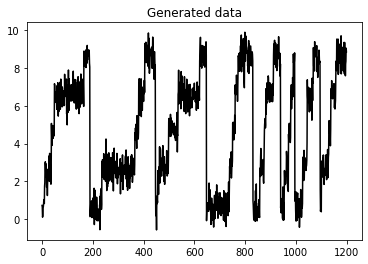

In [7]:
# Generate data using the HMM model
num_samples = 1200
generated_data, _ = hmm.sample(num_samples) 
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

plt.show()